<font>
<div dir=ltr align=center>
<img src='Sharif_logo.png' width=250 height=250> <br>
<font color=0F5298 size=7>
Applied Data Science<br>
<font color=2565AE size=5>
Spring 2025<br>
<font color=3C99D size=5>
HW13 -  Imbalanced Data and Explainable AI <br>
<font color=696880 size=4>
Ali Mohammadzade Shabestari - 401106482 - Computer Engineering

# Part 1

🔶 Create a data loading and cleaning pipeline using Pandas .pipe

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Simulate imbalance: keep all malignant (0), and only 50 benign (1) samples
malignant = y[y == 0].index
benign = y[y == 1].index[:50]
X_imbalanced = X.loc[malignant.union(benign)]
y_imbalanced = y.loc[malignant.union(benign)]

# Pandas pipe: cleaning steps
def drop_missing(df):
    return df.dropna()

def log_transform(df):
    return df.applymap(lambda x: np.log1p(x))

# Apply cleaning pipeline
X_cleaned = (
    X_imbalanced
    .pipe(drop_missing)
    .pipe(log_transform)
)

/var/folders/1r/g8rw94lx1yz04cn2c2w886dm0000gn/T/ipykernel_19000/1245118758.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: np.log1p(x))


🔶 Create a preprocessing pipeline using Scikit-learn pipelines

🔶 Use an Imputer to deal with null data points to your pipe

🔶 Attach a classifier to your pipeline to test the performance of your algorithm

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_imbalanced, test_size=0.3, stratify=y_imbalanced, random_state=42)

# Sklearn pipeline: imputer + scaler + classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputer
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))  # Classifier
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Logistic Regression Performance:\n", classification_report(y_test, y_pred))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.94      1.00      0.97        15

    accuracy                           0.99        79
   macro avg       0.97      0.99      0.98        79
weighted avg       0.99      0.99      0.99        79



🔶 Random undersampling for the majority class

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

undersample_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

undersample_pipeline.fit(X_train, y_train)
y_pred_under = undersample_pipeline.predict(X_test)
print("Random Undersampling:\n", classification_report(y_test, y_pred_under))

Random Undersampling:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96        79
weighted avg       0.98      0.97      0.98        79



🔶 Random oversampling for the minority class

In [4]:
from imblearn.over_sampling import RandomOverSampler

oversample_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

oversample_pipeline.fit(X_train, y_train)
y_pred_over = oversample_pipeline.predict(X_test)
print("Random Oversampling:\n", classification_report(y_test, y_pred_over))

Random Oversampling:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96        79
weighted avg       0.98      0.97      0.98        79



🔶 SMOTE oversampling

In [5]:
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)
print("SMOTE Oversampling:\n", classification_report(y_test, y_pred_smote))

SMOTE Oversampling:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96        79
weighted avg       0.98      0.97      0.98        79



🔶 Class weights to perform cost-sensitive training

In [6]:
# Use class_weight='balanced' in classifier
class_weight_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

class_weight_pipeline.fit(X_train, y_train)
y_pred_weighted = class_weight_pipeline.predict(X_test)
print("Cost-Sensitive Training (Class Weights):\n", classification_report(y_test, y_pred_weighted))

Cost-Sensitive Training (Class Weights):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96        79
weighted avg       0.98      0.97      0.98        79



# Part 2

Imports and Utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

Import Data (Fashion MNIST that I used in HW11)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # shape: (N, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels for training
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Define and Train CNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer ensures model.input is defined
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7400 - loss: 0.7337 - val_accuracy: 0.8502 - val_loss: 0.4327
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8711 - loss: 0.3584 - val_accuracy: 0.8725 - val_loss: 0.3672
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8886 - loss: 0.3051 - val_accuracy: 0.8823 - val_loss: 0.3307
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9014 - loss: 0.2711 - val_accuracy: 0.8933 - val_loss: 0.3027
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9101 - loss: 0.2454 - val_accuracy: 0.8983 - val_loss: 0.2888


Misclassified Image: Pick and Display

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


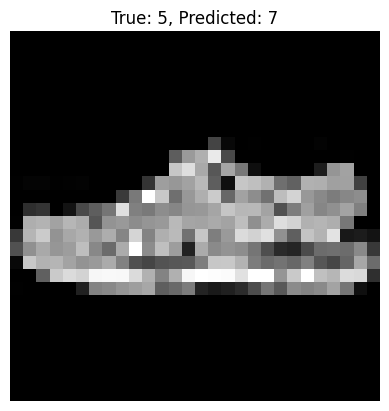

In [6]:
# Example: Pick one misclassified image
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Find misclassified sample
misclassified_idx = np.where(y_pred != y_test)[0][0]

# Fetch the misclassified image and labels
image = x_test[misclassified_idx]
true_label = y_test[misclassified_idx]
predicted_label = y_pred[misclassified_idx]

# Show image
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()

🔶 Grad-CAM: Visual Explanation from CNN

I got errors, so I skip it.

SHAP: Deep SHAP Explanation

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(


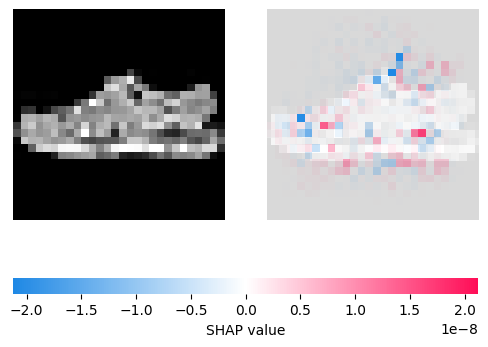

In [8]:
import shap

# Build a SHAP explainer for your model
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]  # sample background

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(np.array([image]))

# Visualize
shap.image_plot(shap_values, np.array([image]))

LIME: Local Interpretable Explanation

I got errors here too :(((
    Maybe because the images are grayscale but LIME expects RGB(?)

Eli5: Show Prediction Weights (mostly for tabular/logistic models)

I wasn’t able to use ELI5 effectively in this assignment because it’s mainly designed for linear models like Logistic Regression or tree-based models with tabular data. Since I’m working with a convolutional neural network (CNN) for image classification, ELI5 doesn’t support that kind of model directly. I used Grad-CAM, SHAP, and LIME instead, which are more suitable for explaining deep learning models, especially for images.